## Importing libraries

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from pandas.plotting import scatter_matrix
import math


import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [109]:
df = pd.read_csv('clean_data_for_regression.csv',index_col=0)

In [110]:
df.head()

,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White,grade,male,preschool,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,0,0,0,0,0,0,1,9,1,1.0,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
1,0,0,1,0,0,0,0,10,0,1.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
2,0,0,0,1,0,0,0,10,1,1.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
3,0,0,0,0,0,0,1,10,0,1.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
4,0,0,0,0,0,0,1,9,0,1.0,...,1.0,1.0,0.0,378.0,20.0,0.0,1,1,502.0,428.96


Splitting the data into training and testing sections

In [111]:
target = df['readingScore']
features = df[['American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander', 'White',
       'grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherWork', 'fatherHS', 'fatherWork', 'selfBornUS', 'motherBornUS',
       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
       'read30MinsADay', 'minutesPerWeekEnglish', 'studentsInEnglish',
       'schoolHasLibrary', 'publicSchool', 'urban', 'schoolSize']]

In [112]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=.2,random_state=23)

In [113]:
x_training, x_val, y_training, y_val = train_test_split(x_train,y_train,test_size=.2,random_state=23)

### Scaling down our continuous data

In [115]:
scaler = StandardScaler()
continuous = ['minutesPerWeekEnglish','studentsInEnglish', 'schoolSize']
for var in continuous:
    scaler.fit(x_training[[var]])
    x_training[var+'_scaled'] = scaler.transform(x_training[[var]])
    x_val[var+'_scaled'] = scaler.transform(x_val[[var]])
    x_test[var+'_scaled'] = scaler.transform(x_test[[var]])
    x_train[var+'_scaled'] = scaler.transform(x_train[[var]])
    
x_train.drop(columns=continuous,inplace=True)    
x_training.drop(columns=continuous,inplace=True)
x_val.drop(columns=continuous,inplace=True)
x_test.drop(columns=continuous,inplace=True)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Introducing all our features to an OLS model

In [116]:
ols_formula = 'readingScore~Asian+Black+Hispanic+White+C(grade)+male+preschool+expectBachelors+motherHS+motherWork+fatherHS+fatherWork+selfBornUS+motherBornUS+fatherBornUS+englishAtHome+computerForSchoolwork+read30MinsADay+minutesPerWeekEnglish_scaled+studentsInEnglish_scaled+schoolHasLibrary+publicSchool+urban+schoolSize_scaled'
ols_model = ols(ols_formula,data=pd.concat([x_training,y_training],axis=1)).fit()

In [117]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     28.74
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          2.29e-121
Time:                        12:17:40   Log-Likelihood:                -11406.
No. Observations:                1991   AIC:                         2.287e+04
Df Residuals:                    1963   BIC:                         2.302e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      350.5823     56.554      6.199      0.000     239.670     461.495
C(grade)[T.9]                   47.5572     53.696      0.886      0.376     -57.749     152.864
C(grade)[T.10]                  88.8877     53.373      1.665      0.096     -15.785     193.561
C(grade)[T.11]                 108.7375     53.470      2.034      0.042       3.874     213.601
C(grade)[T.12]                  77.9681     92.340      0.844      0.399    -103.126     259.062
Asian                           30.0978     11.890      2.531      0.011       6.780      53.416
Black                          -35.5611      9.965     -3.569      0.000     -55.105     -16.018
Hispanic                        -8.6919      9.172     -0.948      0.343     -26.681       9.297
White                           28.0274      8.227      3.407      0.001      11.893      44.162
male                           -10.5857      3.486     -3.036      0.002     -17.423      -3.749
preschool                        1.0047      3.935      0.255      0.798      -6.713       8.722
expectBachelors                 60.7959      4.653     13.065      0.000      51.670      69.922
motherHS                         8.6335      6.949      1.242      0.214      -4.995      22.262
motherWork                       1.8266      3.905      0.468      0.640      -5.832       9.485
fatherHS                        10.0878      6.331      1.593      0.111      -2.329      22.505
fatherWork                       4.3114      4.906      0.879      0.380      -5.311      13.933
selfBornUS                      -0.8222      8.209     -0.100      0.920     -16.922      15.277
motherBornUS                    -5.7459      7.485     -0.768      0.443     -20.425       8.933
fatherBornUS                     3.7937      7.193      0.527      0.598     -10.314      17.901
englishAtHome                   14.0167      7.826      1.791      0.073      -1.332      29.365
computerForSchoolwork           20.9681      6.935      3.023      0.003       7.367      34.569
read30MinsADay                  36.9050      3.808      9.692      0.000      29.437      44.373
minutesPerWeekEnglish_scaled     1.0291      1.752      0.587      0.557      -2.407       4.465
studentsInEnglish_scaled        -3.6235      1.861     -1.947      0.052      -7.273       0.026
schoolHasLibrary               -17.9856      9.746     -1.845      0.065     -37.099       1.127
publicSchool                   -22.9819      6.963     -3.300      0.001     -36.638      -9.325
urban                           -4.8013      4.455     -1.078      0.281     -13.538       3.935
schoolSize_scaled               10.9602      2.136      5.132      0.000       6.772      15.149
============================================================================

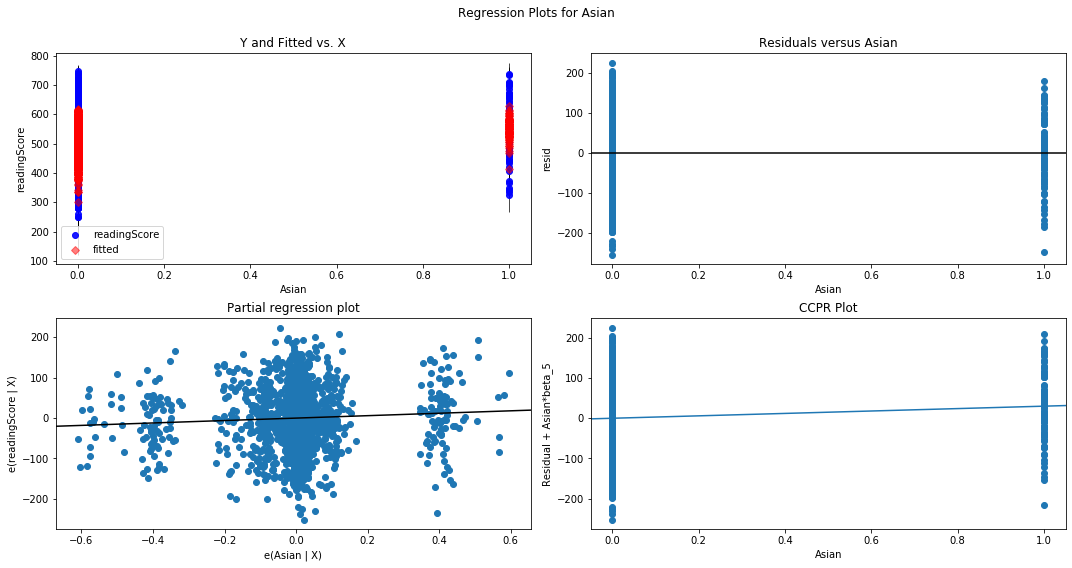

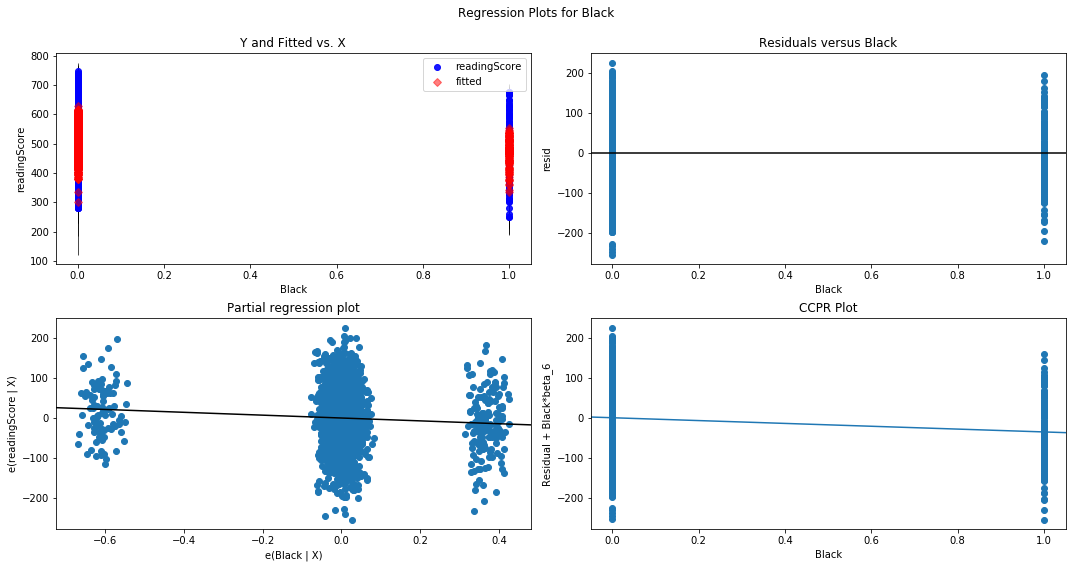

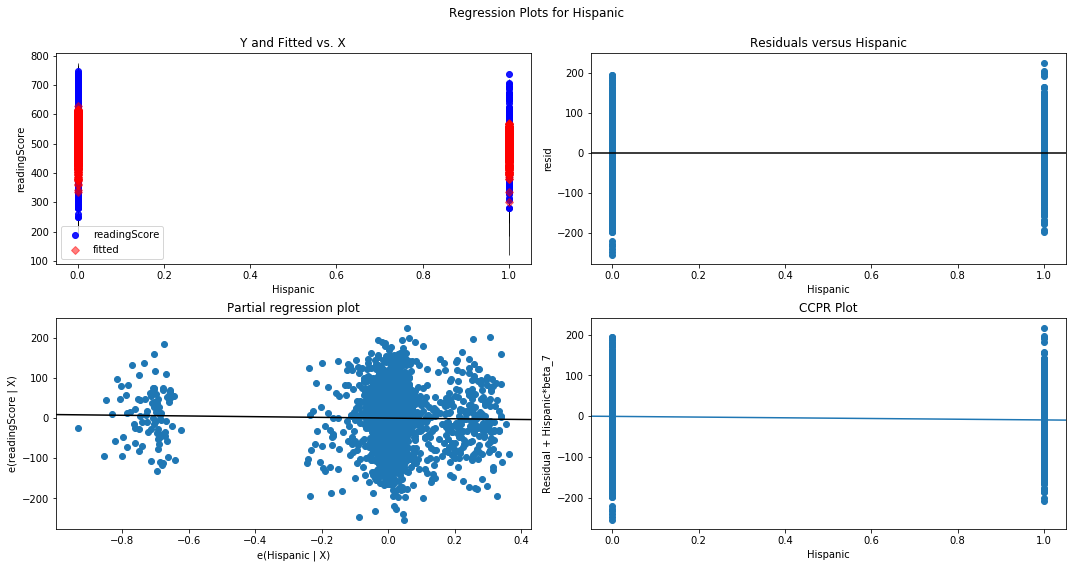

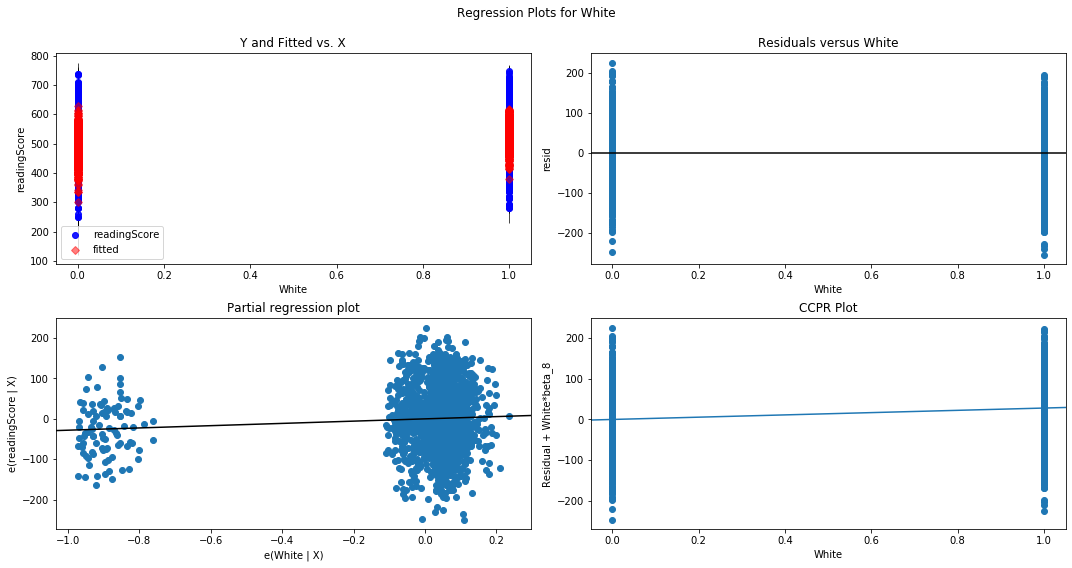

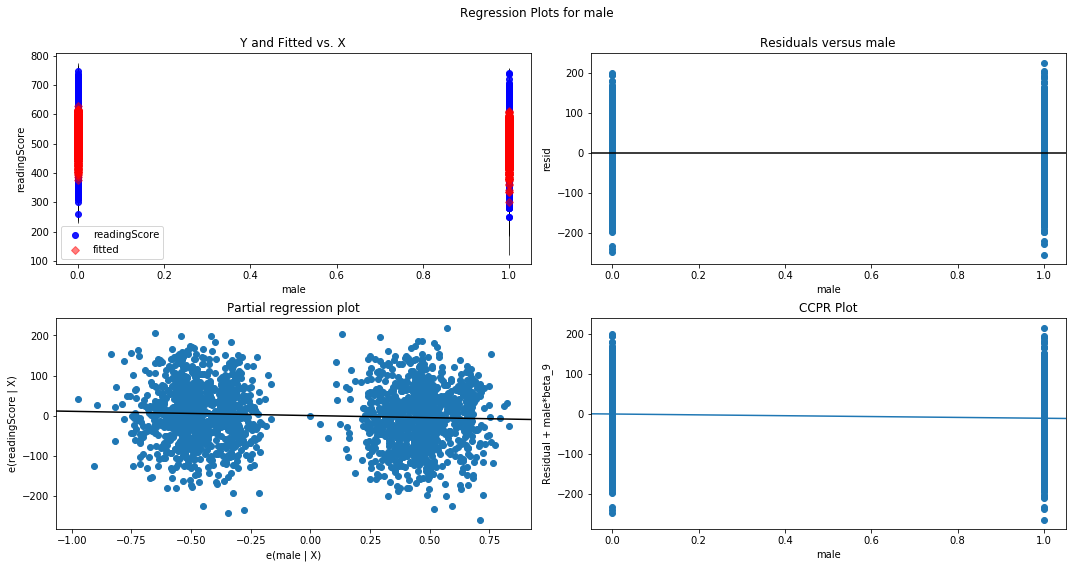

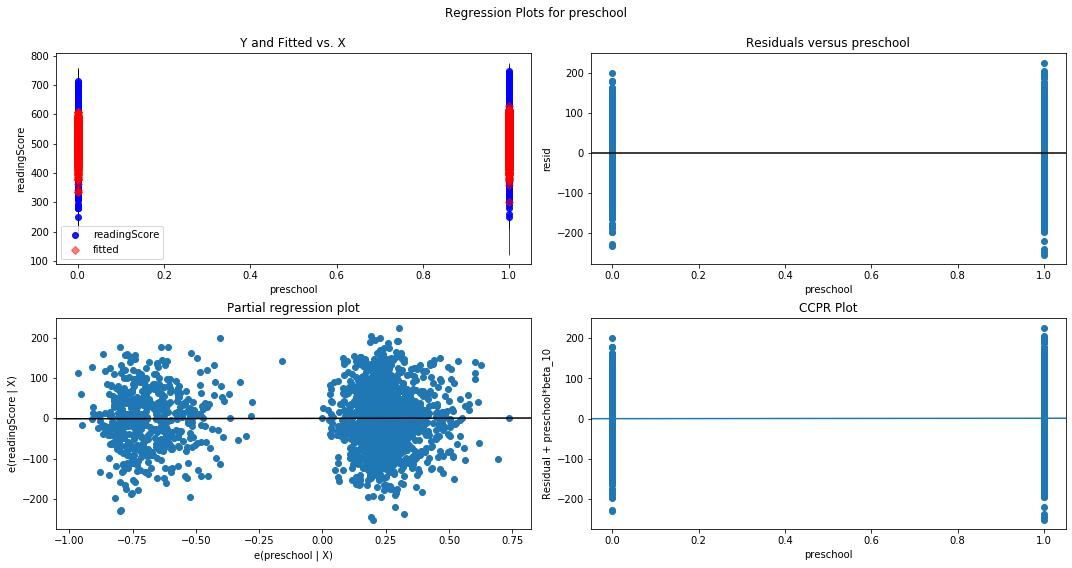

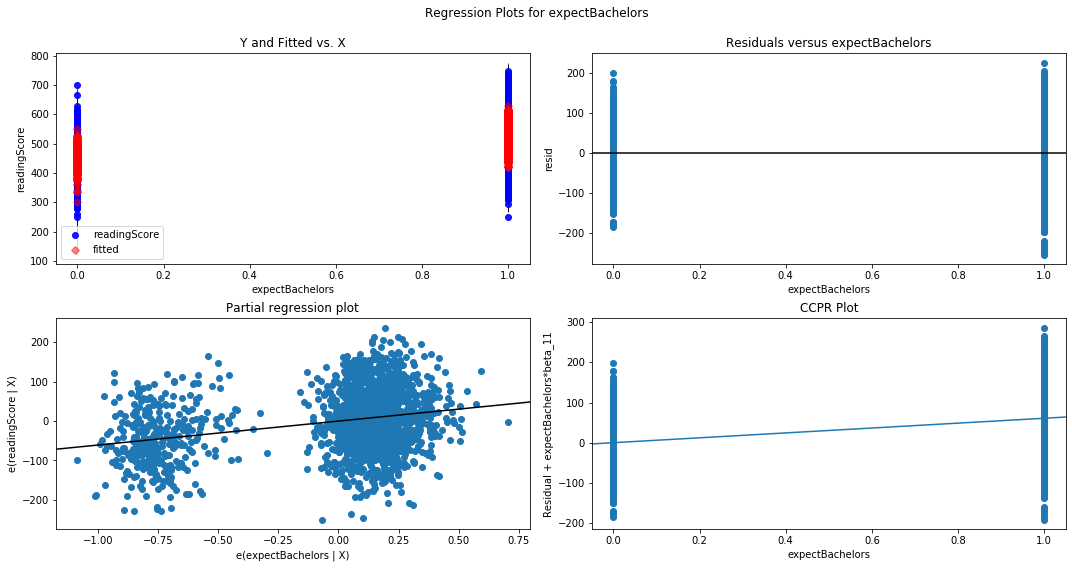

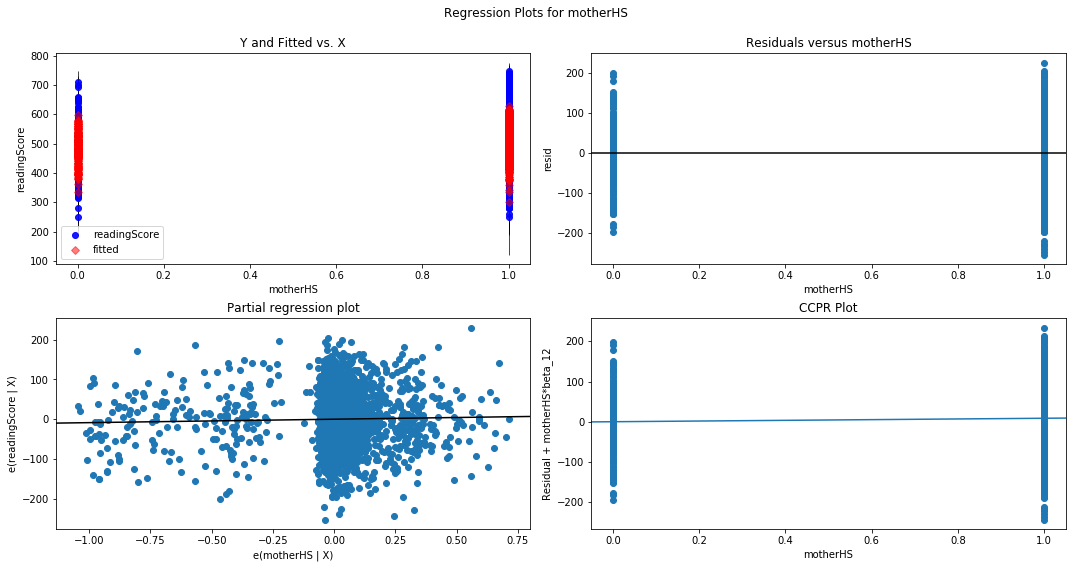

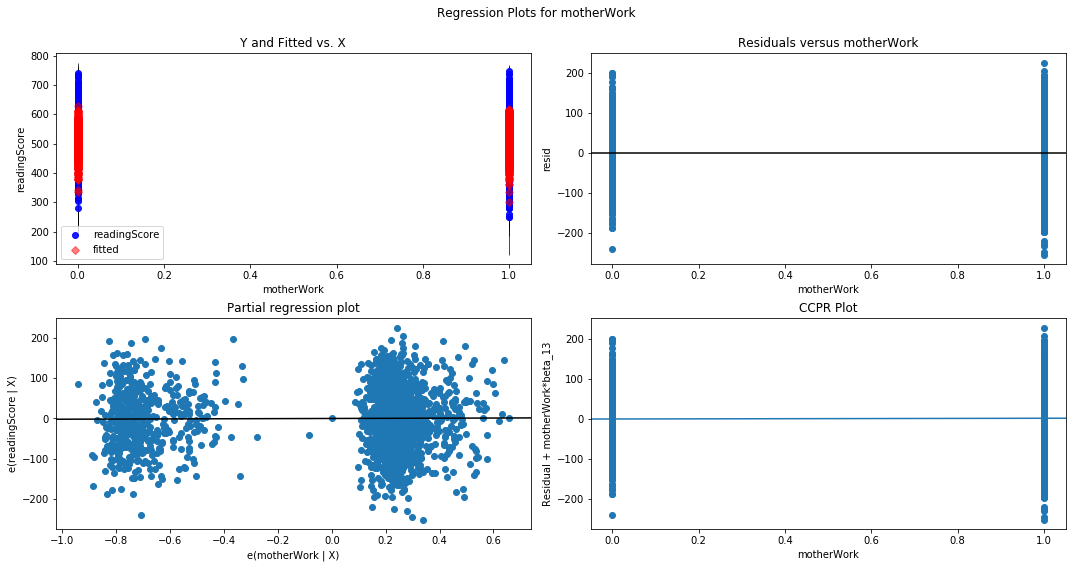

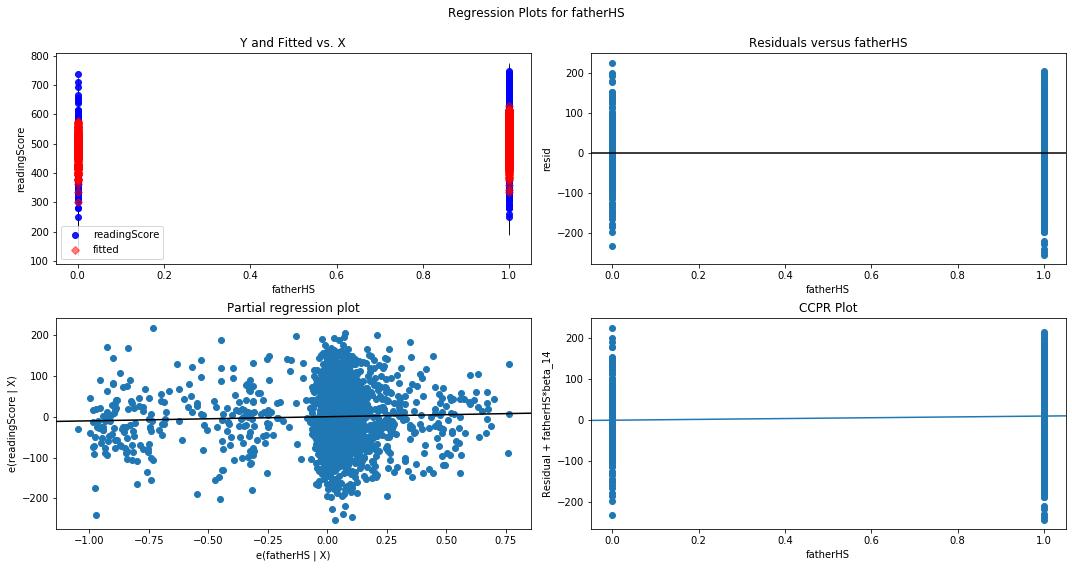

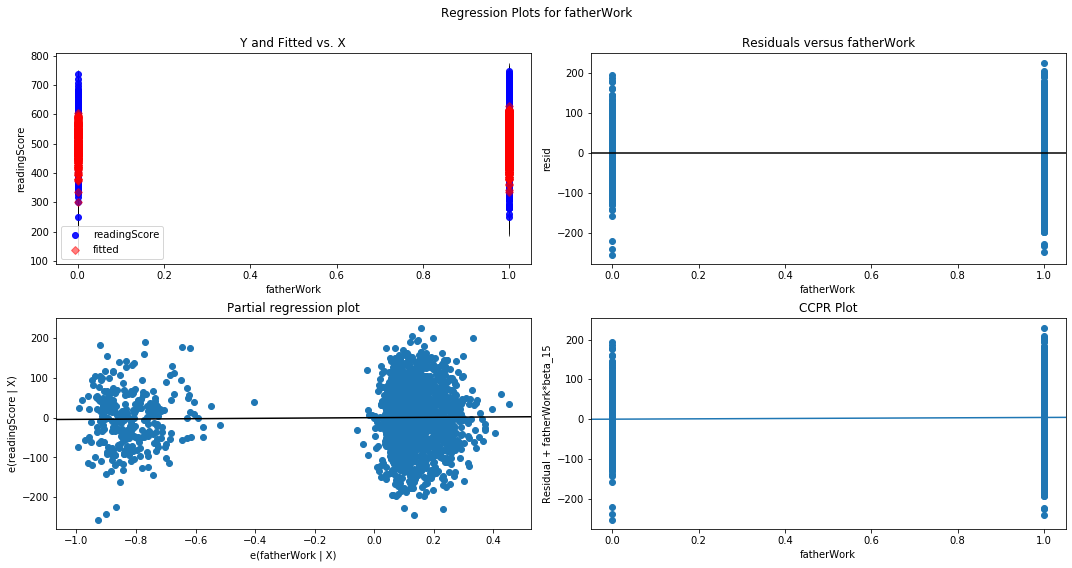

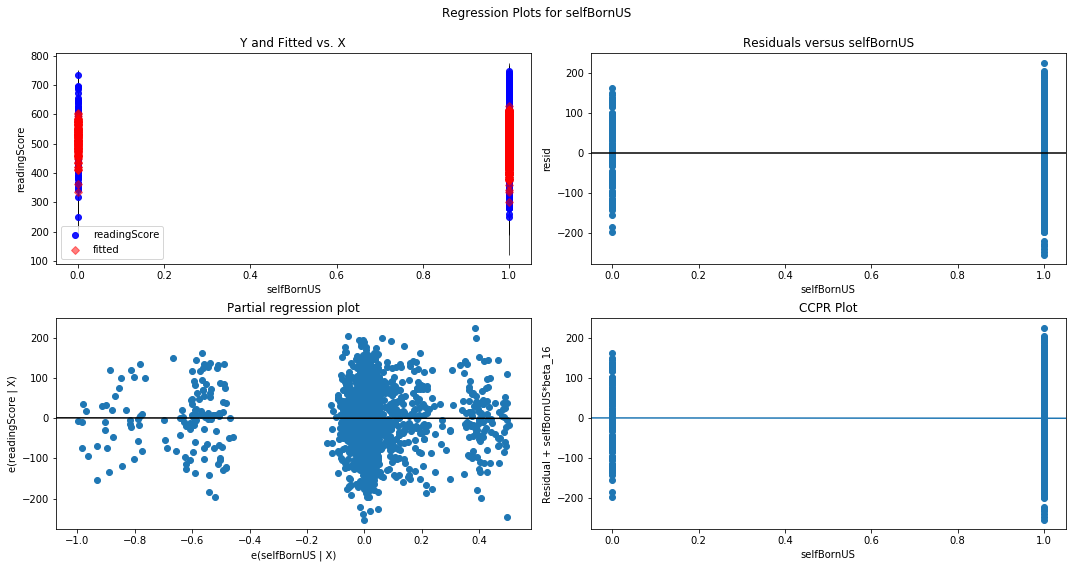

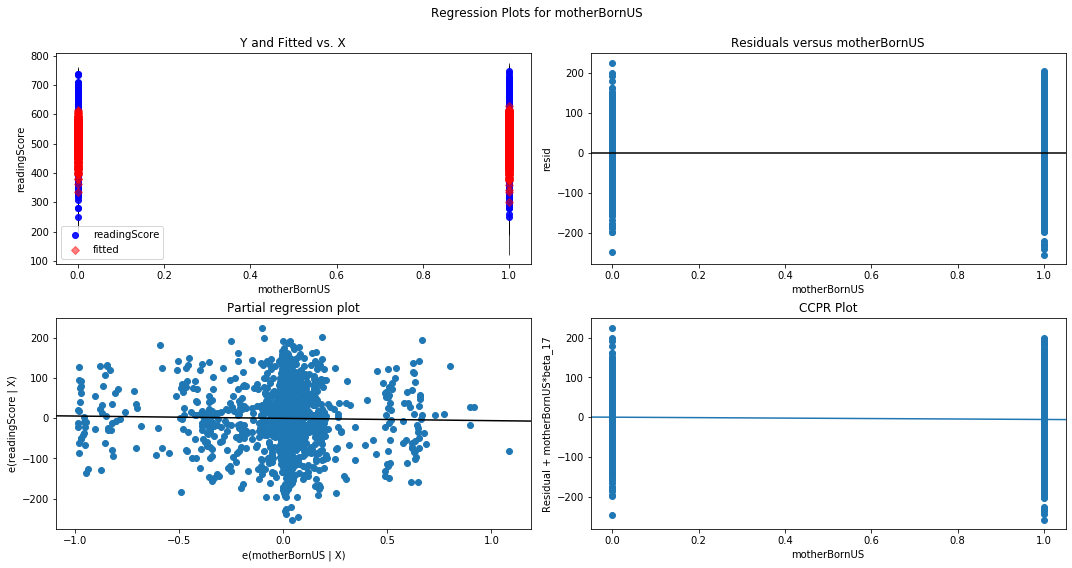

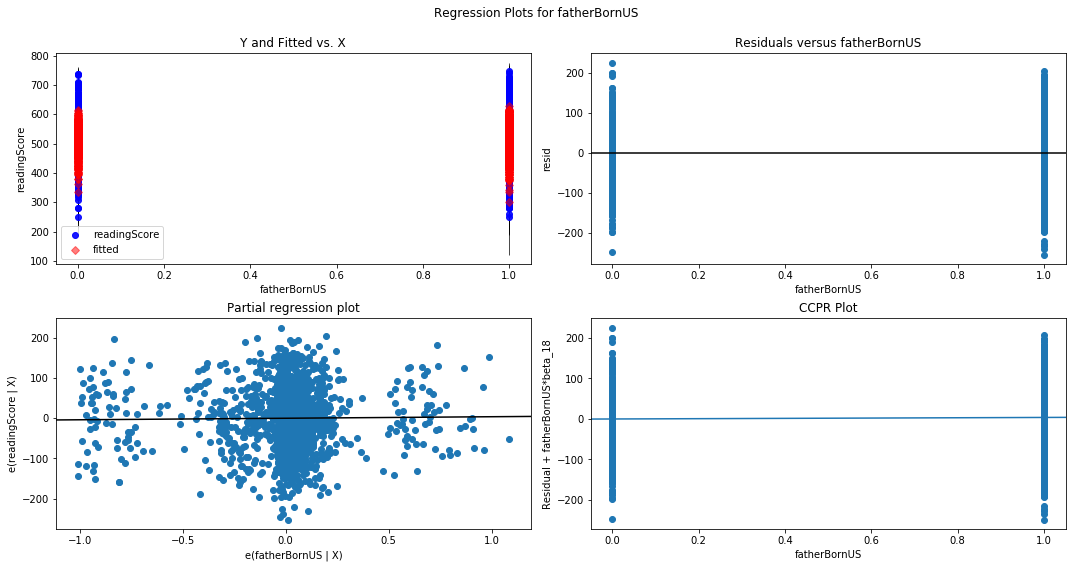

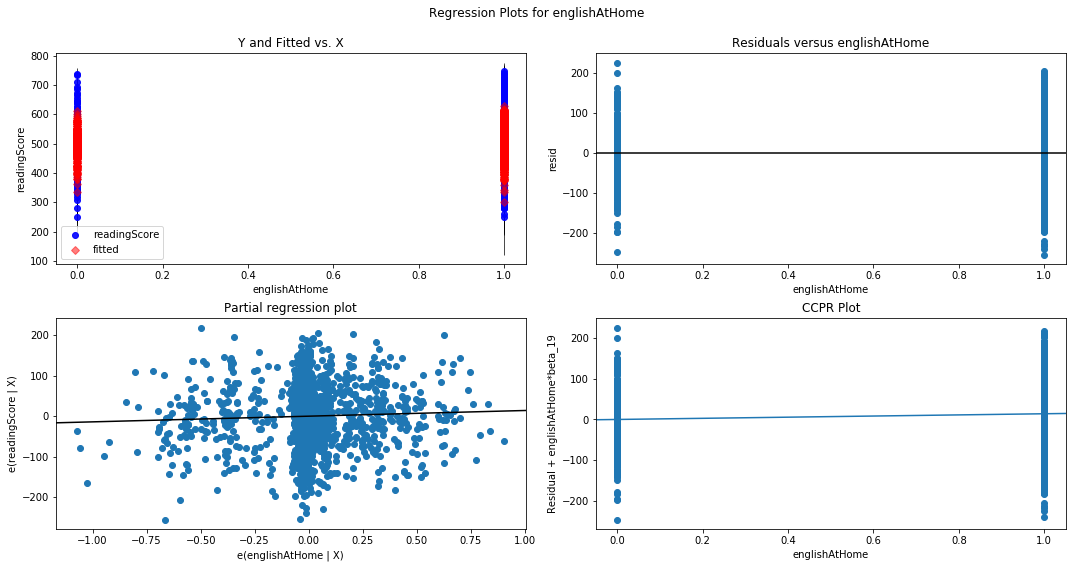

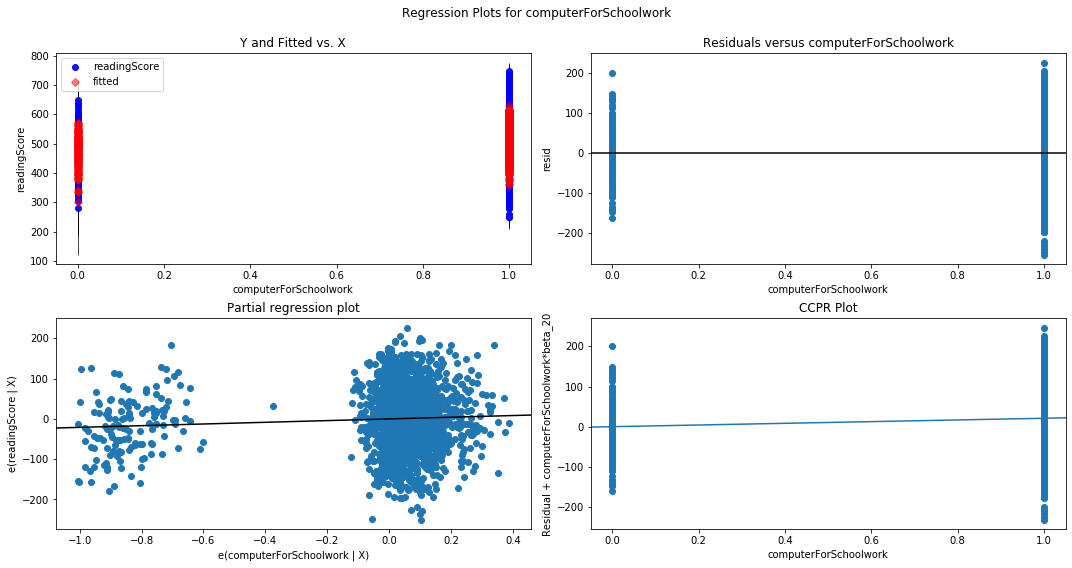

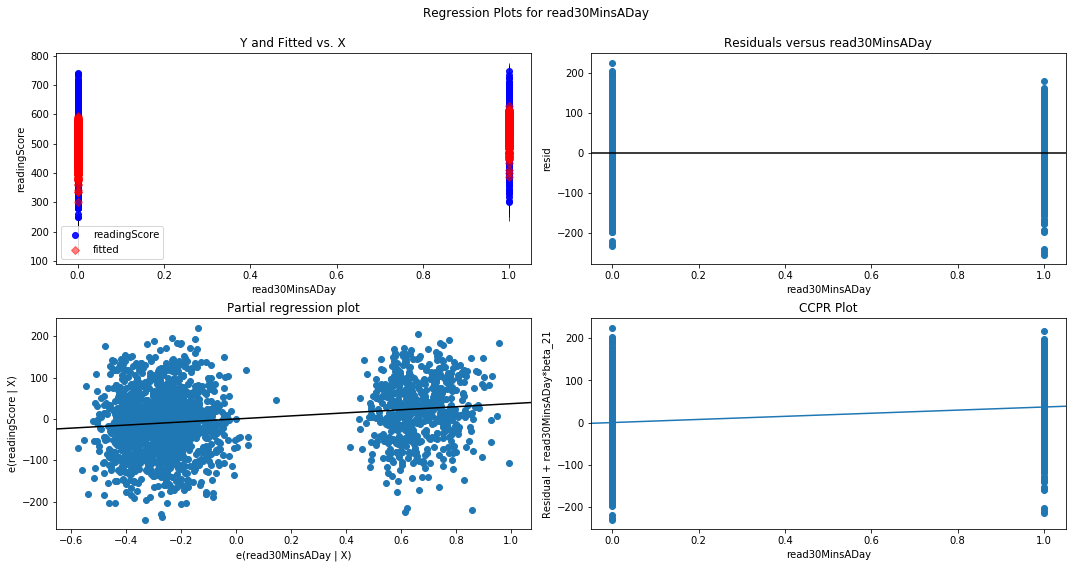

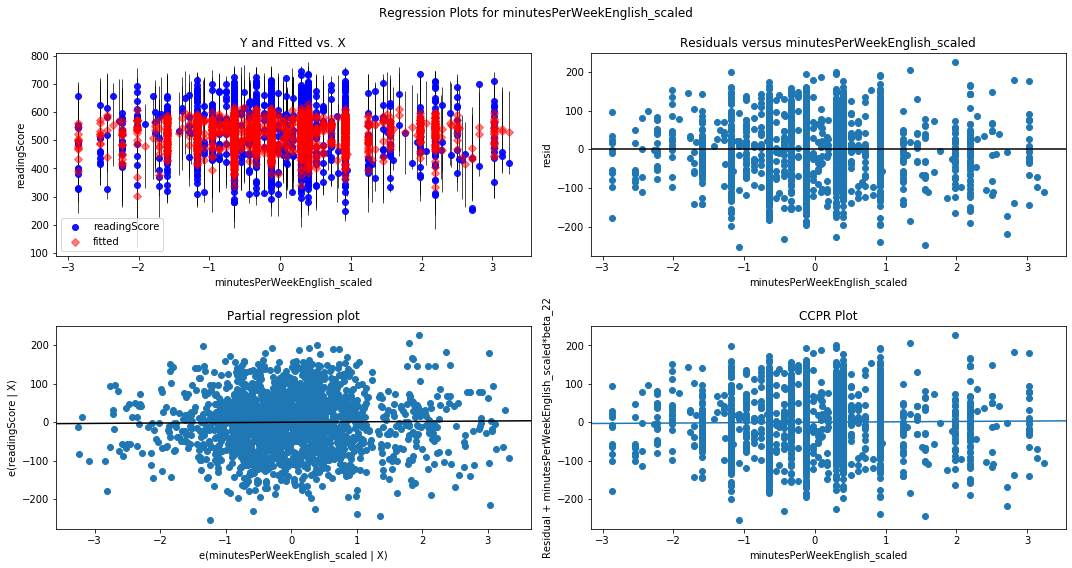

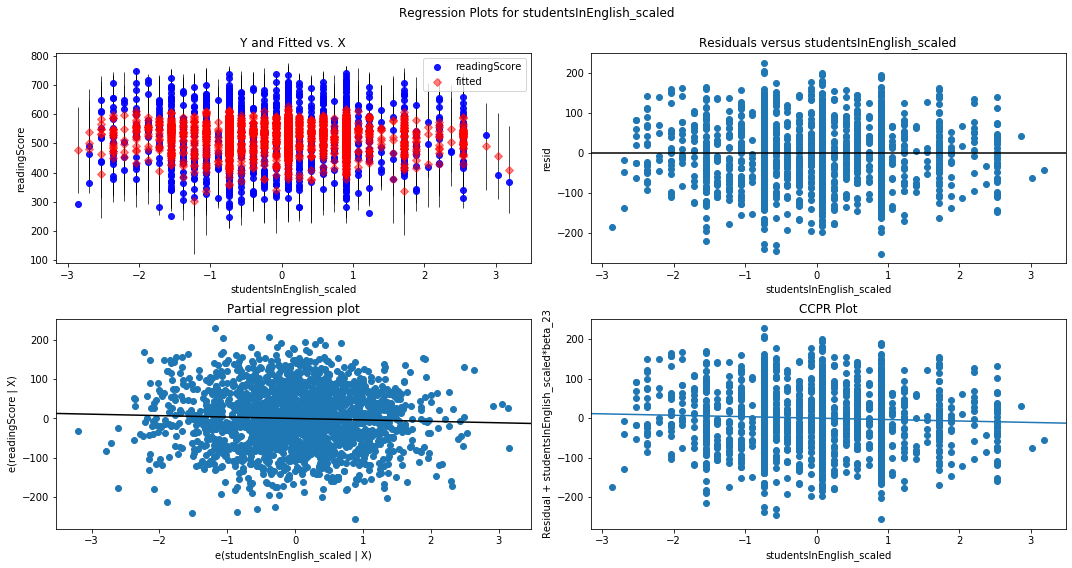

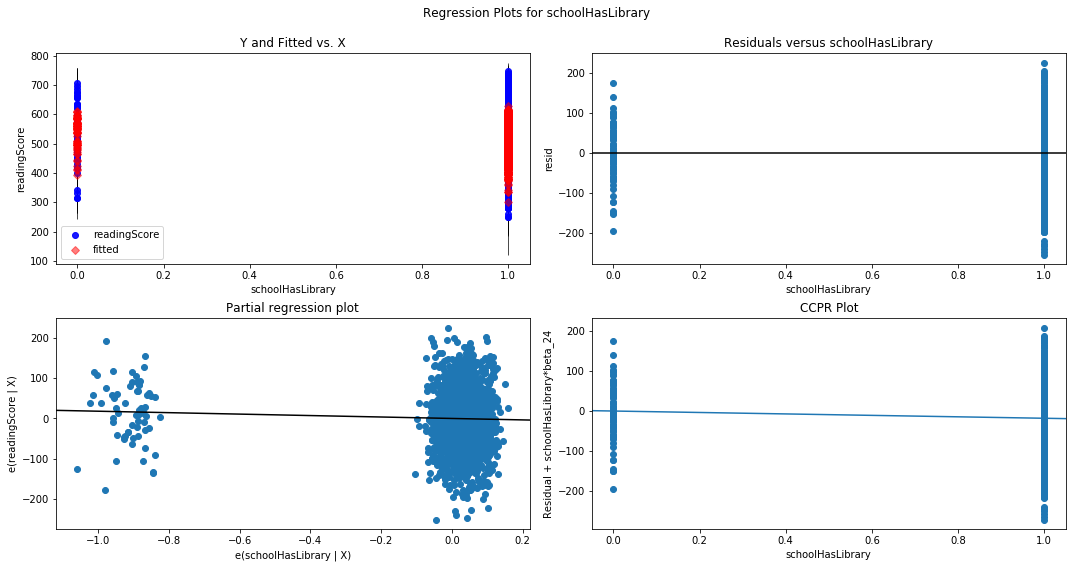

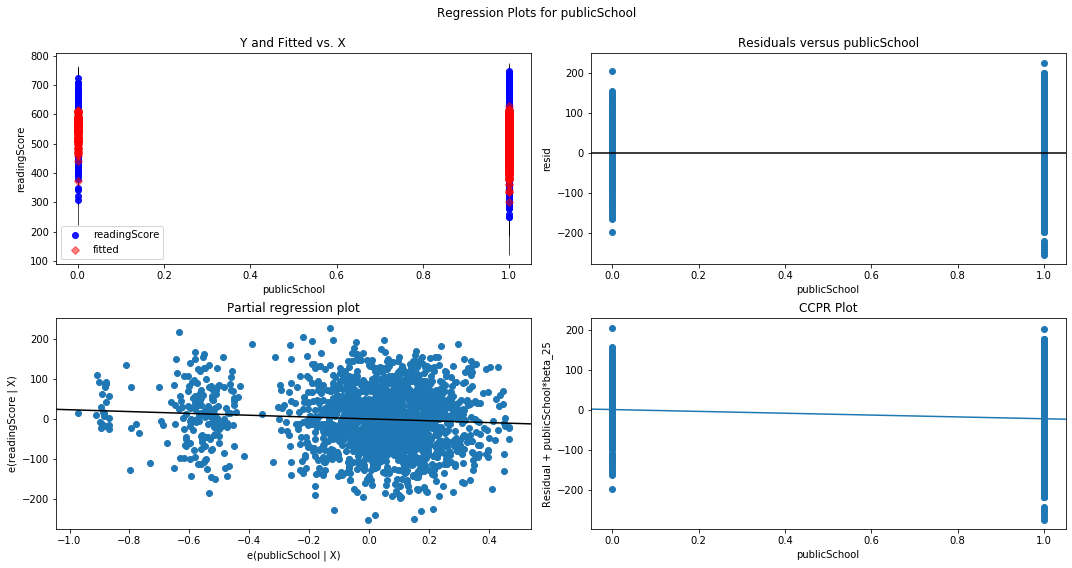

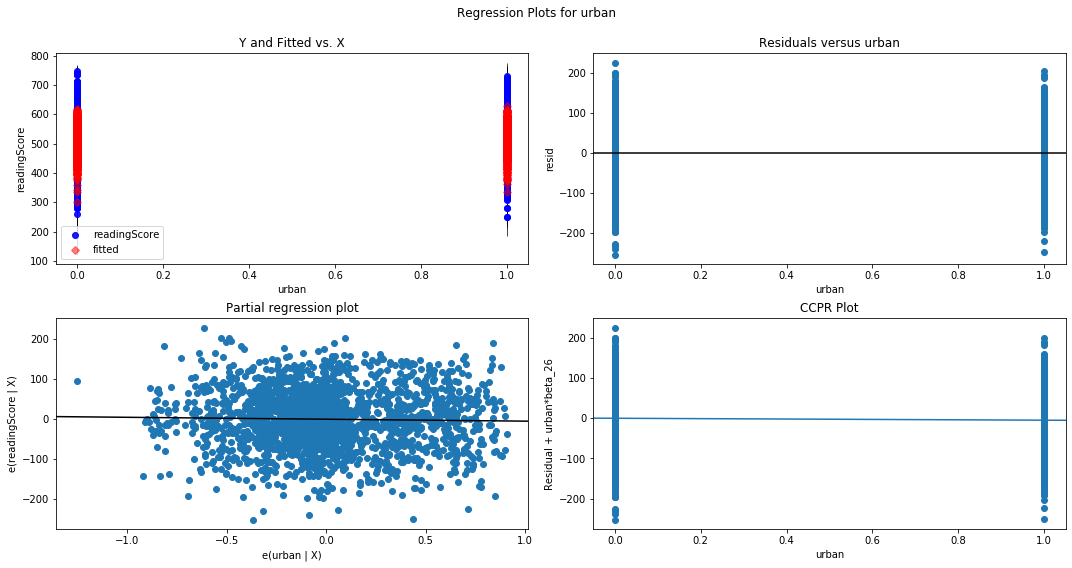

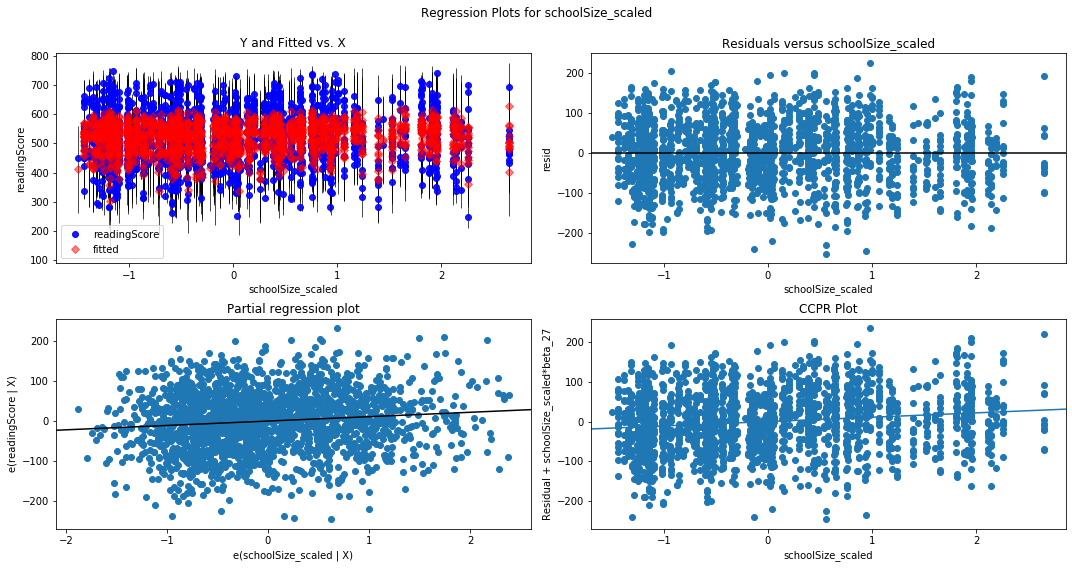

In [106]:
ols_model_features =[
    'Asian','Black','Hispanic','White','male','preschool','expectBachelors',
    'motherHS','motherWork','fatherHS','fatherWork','selfBornUS','motherBornUS','fatherBornUS','englishAtHome',
    'computerForSchoolwork','read30MinsADay','minutesPerWeekEnglish_scaled','studentsInEnglish_scaled','schoolHasLibrary',
    'publicSchool','urban','schoolSize_scaled']


for var in ols_model_features:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(ols_model, var, fig=fig)
    plt.show()

### Here I can see the R squared and the RMSE of my first ols model

In [125]:
ols_model.rsquared

0.28333979368093487

In [145]:
math.sqrt(mean_squared_error(y_val,ols_model.predict(x_val)))

77.98983528758534

Now I will separate the continuous from the categorical and make two models

In [151]:
ols_formula_cat = 'readingScore~Asian+Black+Hispanic+White+C(grade)+male+preschool+expectBachelors+motherHS+motherWork+fatherHS+fatherWork+selfBornUS+motherBornUS+fatherBornUS+englishAtHome+computerForSchoolwork+read30MinsADay+schoolHasLibrary+publicSchool+urban'
ols_model_cat = ols(ols_formula_cat,data=pd.concat([x_training,y_training],axis=1)).fit()
print('my r sqaured is: ',ols_model_cat.rsquared)
print('rmse is: ',math.sqrt(mean_squared_error(y_val,ols_model_cat.predict(x_val))))

my r sqaured is:  0.2733157499725546
rmse is:  78.37751190276299


In [177]:
ols_model_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     30.81
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          7.33e-118
Time:                        14:03:56   Log-Likelihood:                -11420.
No. Observations:                1991   AIC:                         2.289e+04
Df Residuals:                    1966   BIC:                         2.303e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               318.2707     56.383      5.645      0.000     207.694     428.847
C(grade)[T.9]            52.9258     53.962      0.981      0.327     -52.902     158.754
C(grade)[T.10]           94.6270     53.623      1.765      0.078     -10.538     199.792
C(grade)[T.11]          114.6118     53.723      2.133      0.033       9.252     219.972
C(grade)[T.12]           91.6259     92.840      0.987      0.324     -90.449     273.701
Asian                    30.2847     11.953      2.534      0.011       6.844      53.726
Black                   -33.2412     10.009     -3.321      0.001     -52.871     -13.611
Hispanic                 -5.3639      9.205     -0.583      0.560     -23.417      12.689
White                    29.6275      8.269      3.583      0.000      13.411      45.844
male                    -10.2808      3.505     -2.934      0.003     -17.154      -3.408
preschool                 1.8247      3.951      0.462      0.644      -5.924       9.574
expectBachelors          62.6884      4.666     13.436      0.000      53.538      71.839
motherHS                 10.8155      6.977      1.550      0.121      -2.867      24.498
motherWork                1.1463      3.925      0.292      0.770      -6.552       8.844
fatherHS                 10.5958      6.367      1.664      0.096      -1.891      23.082
fatherWork                4.3446      4.932      0.881      0.378      -5.327      14.016
selfBornUS               -0.9963      8.257     -0.121      0.904     -17.191      15.198
motherBornUS             -6.8791      7.527     -0.914      0.361     -21.641       7.883
fatherBornUS              1.4331      7.217      0.199      0.843     -12.721      15.587
englishAtHome            13.8057      7.868      1.755      0.079      -1.626      29.237
computerForSchoolwork    22.8223      6.964      3.277      0.001       9.164      36.480
read30MinsADay           35.7459      3.822      9.352      0.000      28.249      43.242
schoolHasLibrary        -11.0262      9.673     -1.140      0.254     -29.996       7.944
publicSchool             -9.0888      6.277     -1.448      0.148     -21.399       3.221
urban                     3.0683      4.069      0.754      0.451      -4.911      11.048
==============================================================================
Omnibus:                        3.095   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                3.153
Skew:                          -0.090   Prob(JB):                        0.207
Kurtosis:                       2.924   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

I can see a few interesting points, selfBornUS has the highest p value indicating that this feature would not be a good predictor for reading scores. fatherBornUS has the next highest p value, same conclusion. Mother work and preschool are the next two with high p values, once again indicating these will be bad predictors

I will try the same model again with dropping the above features

In [178]:
ols_formula_cat2 = 'readingScore~Asian+Black+Hispanic+White+C(grade)+male+expectBachelors+motherHS+fatherHS+fatherWork+motherBornUS+englishAtHome+computerForSchoolwork+read30MinsADay+schoolHasLibrary+publicSchool+urban'
ols_model_cat2 = ols(ols_formula_cat2,data=pd.concat([x_training,y_training],axis=1)).fit()
print('my r sqaured is: ',ols_model_cat2.rsquared)
print('rmse is: ',math.sqrt(mean_squared_error(y_val,ols_model_cat2.predict(x_val))))

my r sqaured is:  0.2731849753125343
rmse is:  78.46200514593546


After dropping those features nothing seems to have 

Now for continuous

In [152]:
ols_formula_con = 'readingScore~studentsInEnglish_scaled+minutesPerWeekEnglish_scaled+schoolSize_scaled'
ols_model_con = ols(ols_formula_con,data=pd.concat([x_training,y_training],axis=1)).fit()
print('my r sqaured is: ',ols_model_con.rsquared)
print('rmse is: ',math.sqrt(mean_squared_error(y_val,ols_model_con.predict(x_val))))

my r sqaured is:  0.0029666687560325755
rmse is:  90.41432076764616


### I will now try to use a ridge model

In [175]:
lr_ridge = Ridge(alpha = 1, normalize = True, max_iter= 1000)
lr_ridge.fit(x_training, y_training)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [176]:
math.sqrt(mean_squared_error(y_val,lr_ridge.predict(x_val)))

79.9278029023443